In [1]:
%run functions.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('2022-02-08_OPCN3.csv' , sep= ";")

df = corregirFecha(df, 'OADateTime')
df.index = df.OADateTime
df = df.drop('OADateTime', axis = 1)

grimm = pd.read_csv('2022-02-08.csv' , sep = ';')
grimm['date'] = pd.to_datetime(grimm['date'], dayfirst = True) #Pasamos la fecha a datetime
grimm.index = grimm['date']                                    #Ponemos como indice la fecha
grimm = grimm.drop('date', axis = 1)                           #Quitamos el anterior indice

df = df.resample('1T').mean()          #Hacemos medias minutales para poder comparar grimm-opc
grimm = grimm.resample('1T').mean()

In [11]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
df_opc = new_opc_pl(df)  # Nuevo dataframe para el opc pasado a P/L
df_opc['date'] = df.index

df_grimm = correct_bins(grimm)  # Nuevo dataframe para el grimm con los Bins equivalentes del OPC

In [12]:
final_data = df_opc.merge(df_grimm , on = 'date')  # Correlaciones entre bins
final_data = final_data.dropna()

corr = final_data.corr()

corr

,Bin00,Bin01,Bin02,Bin03,Bin04,Bin05,Bin06,Bin07,Bin08,Bin09,...,Bin02_Reference,Bin03_Reference,Bin04_Reference,Bin05_Reference,Bin06_Reference,Bin07_Reference,Bin08_Reference,Bin09_Reference,Bin10_Reference,Bin11_Reference
Bin00,1.000000,0.855910,0.680005,0.498969,0.361686,0.239375,0.274648,0.197345,0.191266,0.224106,...,0.649054,0.513703,0.433380,0.362557,0.339846,0.251952,0.348015,0.327657,0.309975,0.261604
Bin01,0.855910,1.000000,0.913718,0.705202,0.442856,0.154529,0.174834,0.125629,0.116257,0.178349,...,0.810328,0.634235,0.461462,0.269910,0.237369,0.176754,0.264072,0.255537,0.240760,0.200429
Bin02,0.680005,0.913718,1.000000,0.854919,0.601257,0.235531,0.183216,0.132447,0.119163,0.155252,...,0.881209,0.759892,0.581739,0.339412,0.232907,0.154679,0.229450,0.208181,0.193157,0.151195
Bin03,0.498969,0.705202,0.854919,1.000000,0.720286,0.387189,0.284227,0.196731,0.200408,0.172043,...,0.797005,0.765048,0.663293,0.442384,0.267392,0.160183,0.232560,0.198035,0.174786,0.131523
Bin04,0.361686,0.442856,0.601257,0.720286,1.000000,0.613331,0.474988,0.345196,0.370335,0.289515,...,0.626550,0.688197,0.706195,0.633649,0.409611,0.245361,0.336895,0.277558,0.257225,0.190978
Bin05,0.239375,0.154529,0.235531,0.387189,0.613331,1.000000,0.555842,0.375254,0.450961,0.329093,...,0.291346,0.396084,0.546913,0.682112,0.465368,0.253054,0.345153,0.287743,0.257335,0.178993
Bin06,0.274648,0.174834,0.183216,0.284227,0.474988,0.555842,1.000000,0.510693,0.564147,0.479595,...,0.229655,0.302181,0.428087,0.525937,0.494272,0.412214,0.470287,0.431231,0.452287,0.398094
Bin07,0.197345,0.125629,0.132447,0.196731,0.345196,0.375254,0.510693,1.000000,0.502076,0.466384,...,0.191294,0.244225,0.350252,0.381245,0.427214,0.419110,0.489267,0.468987,0.487999,0.441173
Bin08,0.191266,0.116257,0.119163,0.200408,0.370335,0.450961,0.564147,0.502076,1.000000,0.488108,...,0.183696,0.251542,0.368249,0.431713,0.437312,0.416613,0.516372,0.491822,0.508122,0.478378
Bin09,0.224106,0.178349,0.155252,0.172043,0.289515,0.329093,0.479595,0.466384,0.488108,1.000000,...,0.189372,0.212703,0.295304,0.349845,0.407827,0.399208,0.473959,0.454520,0.478485,0.429720


In [23]:
corr.iloc[35,11]

0.40858470058259944

In [6]:
model = LinearRegression()

x = np.array(final_data['Bin10_Reference'])
y = np.array(final_data['Bin10'])

x = x.reshape((-1,1))

model.fit(x , y)
R_sq = model.score(x , y)

m = model.coef_            #Pendiente
ord = model.intercept_     #Ordenada en el origen
r2 = model.score(x , y)                  #Correlación

print('Bin00=' , m , 'x' , 'Bin00_Reference' , '+' , ord ,'      R2=' , r2)

Bin00= [0.35897028] x Bin00_Reference + 3.8938623577178344       R2= 0.22035011516670489


In [7]:
m1 = 0.68108046
ord1 = 13352.691576259891
x1 = np.linspace(0, max(final_data['Bin00_Reference']) , 10)

m2 = 0.68371805
ord2 = 80.17041822839369
x2 = np.linspace(0, max(final_data['Bin03_Reference']) , 10)

m3 = 0.40333095
ord3 = 26.924237614544918 
x3 = np.linspace(0, max(final_data['Bin07_Reference']) , 10)

m4 = 0.35897028
ord4 = 3.8938623577178344       
x4 = np.linspace(0, max(final_data['Bin10_Reference']) , 10)

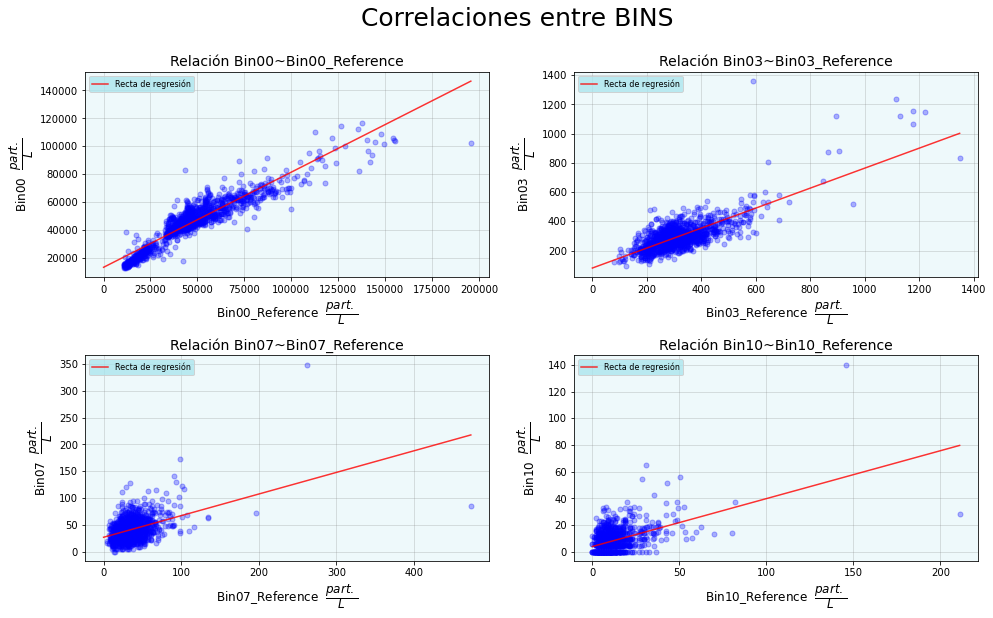

In [8]:
fig, axs = plt.subplots(2, 2,figsize = (16,9))
fig.subplots_adjust(hspace=0.38, wspace=0.21)

fig.suptitle('Correlaciones entre BINS', fontsize = '25')

# GRAFICO 1
axs[0, 0].plot(final_data['Bin00_Reference'],final_data['Bin00'] , "o" ,markersize= 5 , color = 'blue' ,alpha = 0.3 )
axs[0, 0].plot(x1 , m1*x1 + ord1 , linewidth = '1.5' ,  color = 'red' , alpha = 0.8 , label = 'Recta de regresión')
axs[0, 0].set_title("Relación Bin00~Bin00_Reference", fontsize = '14')
axs[0, 0].set_xlabel('Bin00_Reference  $\dfrac{part.}{L}$', fontsize = '12')
axs[0, 0].set_ylabel('Bin00  $\dfrac{part.}{L}$', fontsize = '12')
axs[0, 0].grid(alpha = 0.3, color = 'gray' , linestyle = '-' , linewidth = '0.8')
axs[0, 0].set_facecolor('#ACE5EE33')
axs[0, 0].legend(loc = "upper left" , prop={'size':8}  , facecolor = '#ACE5EE33' )

# GRAFICO 2
axs[0, 1].plot(final_data['Bin03_Reference'],final_data['Bin03'], "o" ,markersize= 5 , color = 'blue' ,alpha = 0.3)
axs[0, 1].plot(x2 , m2*x2 + ord2 , linewidth = '1.5' ,  color = 'red' , alpha = 0.8, label = 'Recta de regresión')
axs[0, 1].set_title("Relación Bin03~Bin03_Reference", fontsize = '14')
axs[0, 1].set_xlabel('Bin03_Reference  $\dfrac{part.}{L}$', fontsize = '12')
axs[0, 1].set_ylabel('Bin03  $\dfrac{part.}{L}$', fontsize = '12')
axs[0, 1].grid(alpha = 0.3, color = 'gray' , linestyle = '-' , linewidth = '0.8')
axs[0, 1].set_facecolor('#ACE5EE33')
axs[0, 1].legend(loc = "upper left" , prop={'size':8}  , facecolor = '#ACE5EE33' )

# GRAFICO 3
axs[1, 0].plot(final_data['Bin07_Reference'],final_data['Bin07'],"o" ,markersize= 5 , color = 'blue' ,alpha = 0.3)
axs[1, 0].plot(x3 , m3*x3 + ord3 , linewidth = '1.5' ,  color = 'red' , alpha = 0.8, label = 'Recta de regresión')
axs[1, 0].set_title("Relación Bin07~Bin07_Reference", fontsize = '14')
axs[1, 0].set_xlabel('Bin07_Reference  $\dfrac{part.}{L}$', fontsize = '12')
axs[1, 0].set_ylabel('Bin07  $\dfrac{part.}{L}$', fontsize = '12')
axs[1, 0].grid(alpha = 0.3, color = 'gray' , linestyle = '-' , linewidth = '0.8')
axs[1, 0].set_facecolor('#ACE5EE33')
axs[1, 0].legend(loc = "upper left" , prop={'size':8}  , facecolor = '#ACE5EE33' )

# GRAFICO 4
axs[1, 1].plot(final_data['Bin10_Reference'],final_data['Bin10'],"o" ,markersize= 5 , color = 'blue' ,alpha = 0.3)
axs[1, 1].plot(x4 , m4*x4 + ord4 , linewidth = '1.5' ,  color = 'red' , alpha = 0.8, label = 'Recta de regresión')
axs[1, 1].set_title("Relación Bin10~Bin10_Reference", fontsize = '14')
axs[1, 1].set_xlabel('Bin10_Reference  $\dfrac{part.}{L}$', fontsize = '12')
axs[1, 1].set_ylabel('Bin10  $\dfrac{part.}{L}$', fontsize = '12')
axs[1, 1].grid(alpha = 0.3, color = 'gray' , linestyle = '-' , linewidth = '0.8')
axs[1, 1].set_facecolor('#ACE5EE33')
axs[1, 1].legend(loc = "upper left" , prop={'size':8}  , facecolor = '#ACE5EE33' )

plt.savefig('bins_ajuste.pdf', bbox_inches='tight')

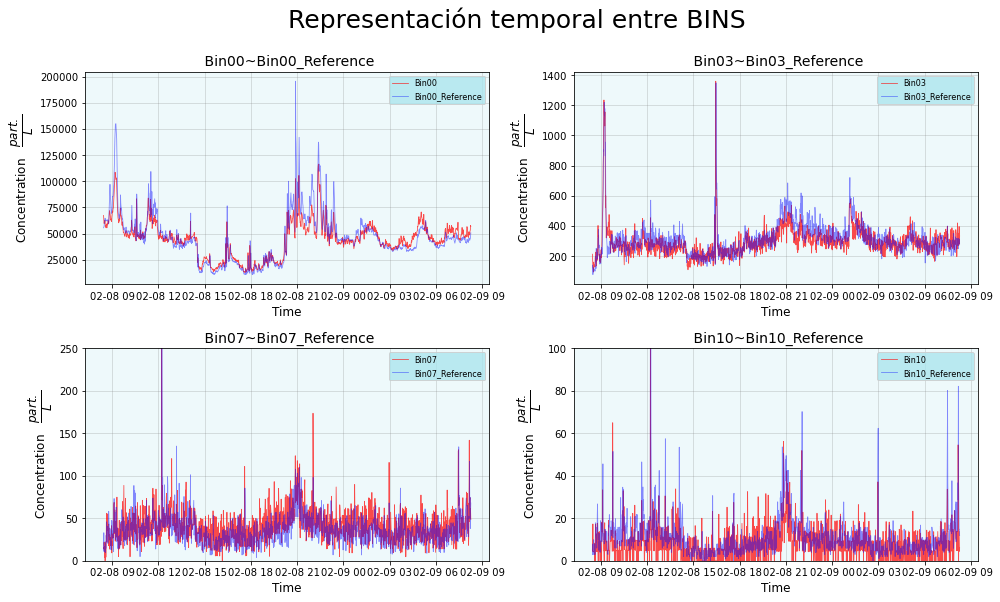

In [9]:
fig, axs = plt.subplots(2, 2,figsize = (16,9))
fig.subplots_adjust(hspace=0.30, wspace=0.21)
fig.suptitle('Representación temporal entre BINS', fontsize = '25')

# GRAFICO 1
axs[0, 0].plot(final_data['date'],final_data['Bin00']  , linewidth = '0.8' ,  color = 'r' , alpha = 0.7, label = 'Bin00')        
axs[0, 0].plot(final_data['date'], final_data['Bin00_Reference'], linewidth = '0.8' ,  color = 'b' , alpha = 0.45 , label = 'Bin00_Reference')  
axs[0, 0].set_title(" Bin00~Bin00_Reference", fontsize = '14')
axs[0, 0].set_xlabel('Time', fontsize = '12')
axs[0, 0].set_ylabel('Concentration   $\dfrac{part.}{L}$', fontsize = '12')
axs[0, 0].grid(alpha = 0.3, color = 'gray' , linestyle = '-' , linewidth = '0.8')
axs[0, 0].set_facecolor('#ACE5EE33')
axs[0, 0].legend(loc = "upper right" , prop={'size':8}  , facecolor = '#ACE5EE33' )

# GRAFICO 2
axs[0, 1].plot(final_data['date'],final_data['Bin03']  , linewidth = '0.8' ,  color = 'r' , alpha = 0.7, label = 'Bin03')        
axs[0, 1].plot(final_data['date'], final_data['Bin03_Reference'], linewidth = '0.8' ,  color = 'b' , alpha = 0.45 , label = 'Bin03_Reference')  
axs[0, 1].set_title(" Bin03~Bin03_Reference", fontsize = '14')
axs[0, 1].set_xlabel('Time', fontsize = '12')
axs[0, 1].set_ylabel('Concentration   $\dfrac{part.}{L}$', fontsize = '12')
axs[0, 1].grid(alpha = 0.3, color = 'gray' , linestyle = '-' , linewidth = '0.8')
axs[0, 1].set_facecolor('#ACE5EE33')
axs[0, 1].legend(loc = "upper right" , prop={'size':8}  , facecolor = '#ACE5EE33' )

# GRAFICO 3
axs[1, 0].plot(final_data['date'],final_data['Bin07']  , linewidth = '0.8' ,  color = 'r' , alpha = 0.7, label = 'Bin07')        
axs[1, 0].plot(final_data['date'], final_data['Bin07_Reference'], linewidth = '0.8' ,  color = 'b' , alpha = 0.45 , label = 'Bin07_Reference')  
axs[1, 0].set_ylim(0,250)
axs[1, 0].set_title(" Bin07~Bin07_Reference", fontsize = '14')
axs[1, 0].set_xlabel('Time', fontsize = '12')
axs[1, 0].set_ylabel('Concentration   $\dfrac{part.}{L}$', fontsize = '12')
axs[1, 0].grid(alpha = 0.3, color = 'gray' , linestyle = '-' , linewidth = '0.8')
axs[1, 0].set_facecolor('#ACE5EE33')
axs[1, 0].legend(loc = "upper right" , prop={'size':8}  , facecolor = '#ACE5EE33' )

# GRAFICO 4
axs[1, 1].plot(final_data['date'],final_data['Bin10']  , linewidth = '0.8' ,  color = 'r' , alpha = 0.7, label = 'Bin10')        
axs[1, 1].plot(final_data['date'], final_data['Bin10_Reference'], linewidth = '0.8' ,  color = 'b' , alpha = 0.45 , label = 'Bin10_Reference')  
axs[1, 1].set_ylim(0,100)
axs[1, 1].set_title(" Bin10~Bin10_Reference", fontsize = '14')
axs[1, 1].set_xlabel('Time', fontsize = '12')
axs[1, 1].set_ylabel('Concentration   $\dfrac{part.}{L}$', fontsize = '12')
axs[1, 1].grid(alpha = 0.3, color = 'gray' , linestyle = '-' , linewidth = '0.8')
axs[1, 1].set_facecolor('#ACE5EE33')
axs[1, 1].legend(loc = "upper right" , prop={'size':8}  , facecolor = '#ACE5EE33' )

plt.savefig('bins_temp.pdf', bbox_inches='tight')